# Szeregi czasowe - preprocessing

Zbiór danych: https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale

In [1]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
# wczytanie danych
df = pd.read_csv("data/ExportSales.csv")

In [3]:
# nagłówek
df.head()

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240
2,2529606,2019-05-13,Category5,507,30011006,513,BHR,100,749.9520
3,2529607,2019-06-01,Category5,795,30011006,5,SYC,100,556.8170
4,2529608,2019-07-03,Category5,1184,30011006,560,AFG,20,39.4460


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7811 non-null   int64  
 1   Date            7811 non-null   object 
 2   Category        7811 non-null   object 
 3   Invoice Number  7811 non-null   int64  
 4   Product Code    7811 non-null   int64  
 5   Customer Code   7811 non-null   int64  
 6   Destenation     7701 non-null   object 
 7   QTY             7811 non-null   int64  
 8   Total Price     7811 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 549.3+ KB


In [5]:
# konwersja daty
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              7811 non-null   int64         
 1   Date            7811 non-null   datetime64[ns]
 2   Category        7811 non-null   object        
 3   Invoice Number  7811 non-null   int64         
 4   Product Code    7811 non-null   int64         
 5   Customer Code   7811 non-null   int64         
 6   Destenation     7701 non-null   object        
 7   QTY             7811 non-null   int64         
 8   Total Price     7811 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 549.3+ KB


In [7]:
# agregacja danych
df[['Date','QTY']].groupby('Date').sum().reset_index()

,Date,QTY
0,2019-04-07,455
1,2019-04-10,2100
2,2019-04-18,1700
3,2019-04-28,7450
4,2019-04-29,4550
...,...,...
336,2022-09-11,22446
337,2022-09-12,2600
338,2022-09-13,12243
339,2022-09-14,9000


<Axes: xlabel='Date'>

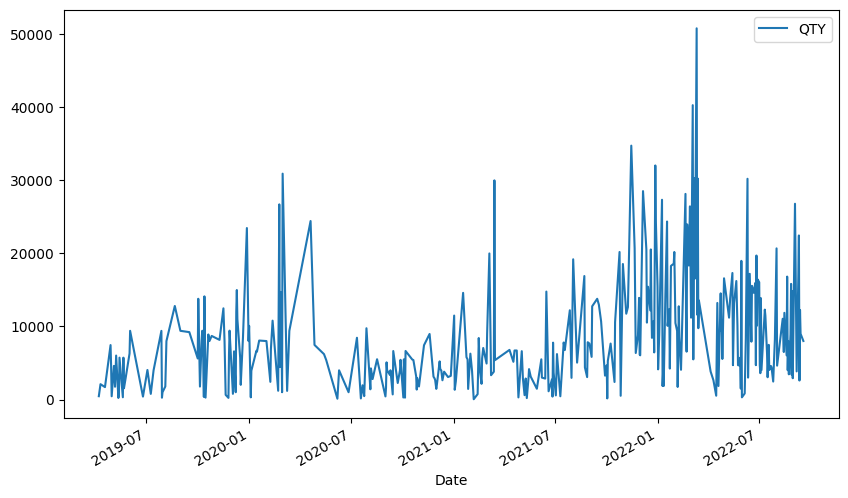

In [9]:
# jeden szereg czasowy - wykres
df[['Date','QTY']].groupby('Date').sum().plot()

In [10]:
# rok-miesiac
df['month_year'] = df['Date'].dt.to_period('M').dt.to_timestamp()


In [11]:
df.head()

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,month_year
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225,2019-04-01
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240,2019-04-01
2,2529606,2019-05-13,Category5,507,30011006,513,BHR,100,749.9520,2019-05-01
3,2529607,2019-06-01,Category5,795,30011006,5,SYC,100,556.8170,2019-06-01
4,2529608,2019-07-03,Category5,1184,30011006,560,AFG,20,39.4460,2019-07-01


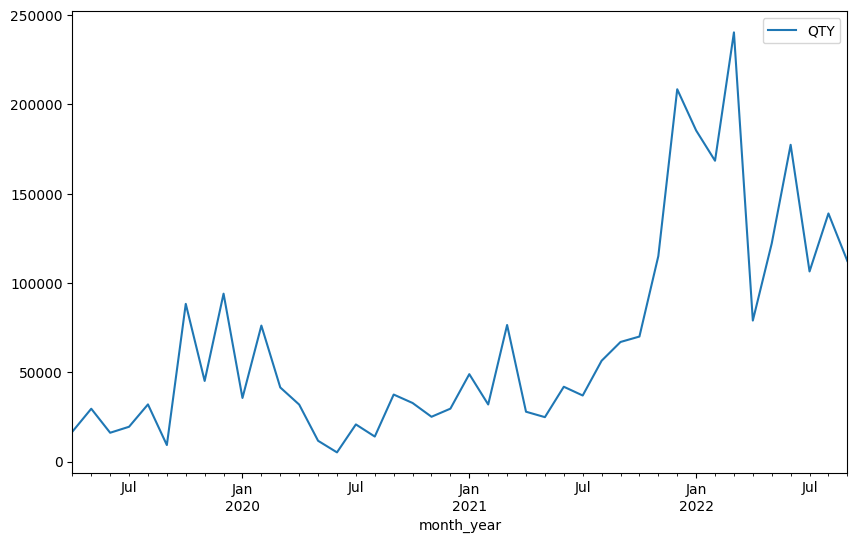

In [ ]:
# wykres miesieczny
df[['month_year','QTY']].groupby('month_year').sum().plot()
plt.show()

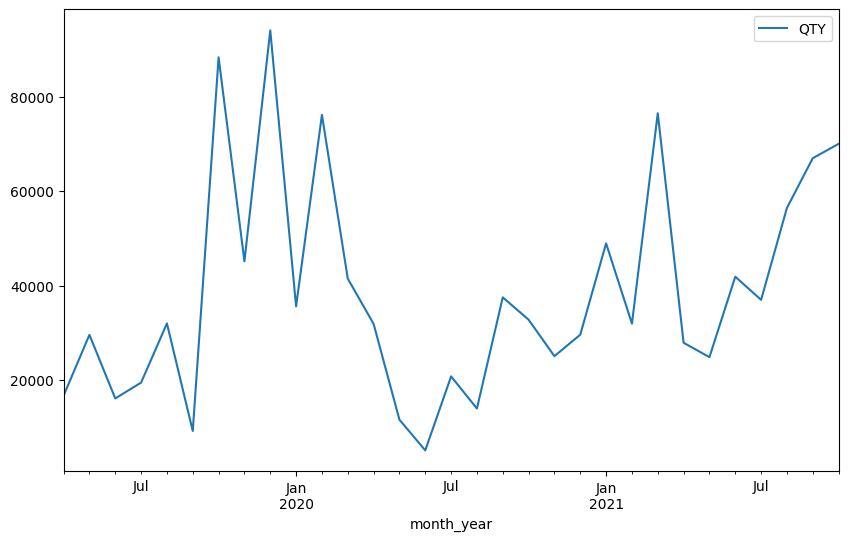

In [13]:
df.loc[df['Date'] <='2021-10-31',['month_year','QTY']].groupby('month_year').sum().plot()
plt.show()


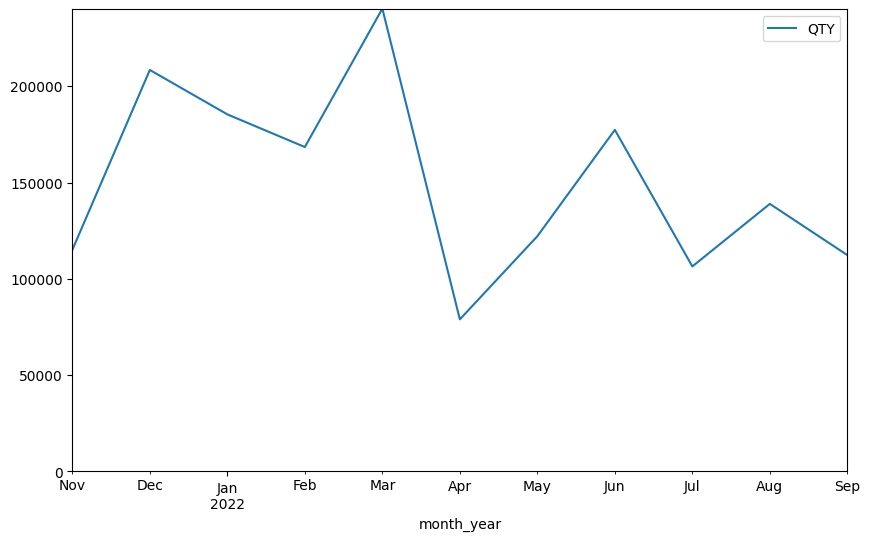

In [15]:
df.loc[df['Date'] >'2021-10-31',['month_year','QTY']].groupby('month_year').sum().plot()
plt.ylim(0,240000)
plt.show()

In [16]:
# początek tygodnia
df['week_start_date'] = df['Date'] - pd.to_timedelta(df['Date'].dt.weekday, unit= 'D')

In [17]:
df.head()

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,month_year,week_start_date
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225,2019-04-01,2019-04-22
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240,2019-04-01,2019-04-29
2,2529606,2019-05-13,Category5,507,30011006,513,BHR,100,749.9520,2019-05-01,2019-05-13
3,2529607,2019-06-01,Category5,795,30011006,5,SYC,100,556.8170,2019-06-01,2019-05-27
4,2529608,2019-07-03,Category5,1184,30011006,560,AFG,20,39.4460,2019-07-01,2019-07-01


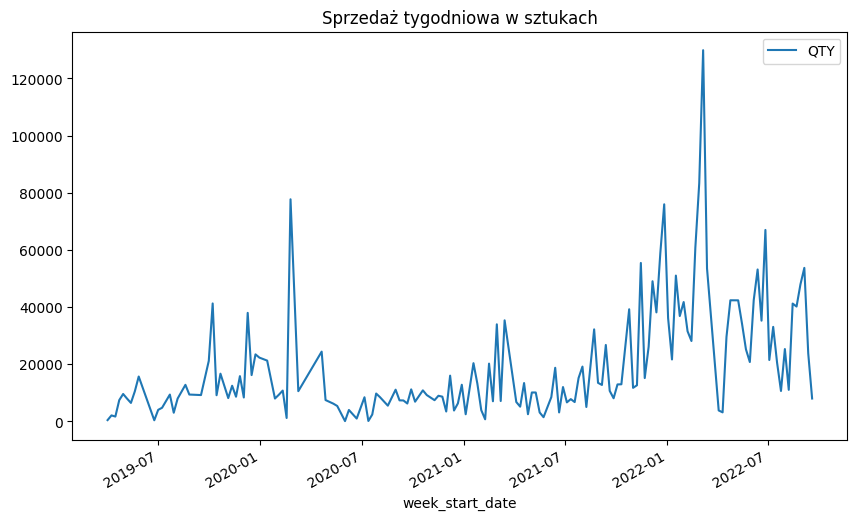

In [18]:
#wykres tygodniowy
df[['week_start_date','QTY']].groupby('week_start_date').sum().plot()
plt.title('Sprzedaż tygodniowa w sztukach')
plt.show()

In [19]:
# wykluczenia
data_check = df[['Product Code', 'Date']].groupby('Product Code').agg({'Date': ['min','max','count']}).reset_index()
data_check.columns = ['Product Code', 'min_date','max_date','n']
data_check

,Product Code,min_date,max_date,n
0,30001036,2020-04-27,2020-12-02,3
1,30001039,2019-04-29,2020-12-02,21
2,30001040,2019-04-29,2020-12-02,21
3,30001052,2019-06-01,2019-06-01,2
4,30001056,2019-06-01,2019-12-10,3
...,...,...,...,...
347,30011022,2020-07-25,2022-08-21,19
348,30011023,2020-12-22,2022-08-21,15
349,30011025,2021-11-29,2022-07-30,7
350,30011026,2022-09-11,2022-09-13,4


In [20]:
# dlugosc historii
data_check.sort_values(by='n', ascending=False)


,Product Code,min_date,max_date,n
287,30006003,2019-07-03,2022-09-19,463
288,30006004,2019-07-03,2022-09-13,344
286,30006002,2019-07-03,2022-09-13,328
329,30009011,2019-09-16,2022-08-21,242
296,30006023,2019-12-17,2022-09-13,213
...,...,...,...,...
40,30001144,2019-07-09,2019-07-09,1
44,30001154,2019-04-29,2019-04-29,1
324,30007013,2022-09-10,2022-09-10,1
325,30007014,2022-09-10,2022-09-10,1


In [21]:
data_check['days_of_history'] = (data_check['max_date'] - data_check['min_date']).dt.days

In [22]:
#describe
data_check.describe()

,Product Code,min_date,max_date,n,days_of_history
count,3.520000e+02,352,352,352.000000,352.000000
mean,3.000265e+07,2020-09-03 01:13:38.181818112,2021-10-26 23:51:49.090909184,22.190341,418.943182
min,3.000104e+07,2019-04-07 00:00:00,2019-04-29 00:00:00,1.000000,0.000000
25%,3.000128e+07,2019-10-02 00:00:00,2021-03-15 00:00:00,3.000000,43.000000
50%,3.000139e+07,2020-07-29 00:00:00,2022-05-27 12:00:00,11.000000,390.000000
75%,3.000214e+07,2021-05-10 00:00:00,2022-08-31 00:00:00,22.250000,749.750000
max,3.001600e+07,2022-09-13 00:00:00,2022-09-19 00:00:00,463.000000,1211.000000
std,2.621609e+03,NaN,NaN,43.671470,339.270505


In [23]:
# filtry
list_of_products_to_analysis = data_check.loc[(data_check['n']>=3) &
                                              (data_check['max_date']>='2022-01-01') &
                                              (data_check['days_of_history']>10), 'Product Code'] 
list_of_products_to_analysis

47     30001182
83     30001278
84     30001279
85     30001280
86     30001281
         ...   
345    30011019
347    30011022
348    30011023
349    30011025
351    30016003
Name: Product Code, Length: 166, dtype: int64

In [24]:
# agregacja i filtrowanie danych
df_to_analysis_weekly = df.loc[df['Product Code'].isin(list_of_products_to_analysis),['week_start_date','QTY','Total Price']].groupby('week_start_date').sum()

In [25]:
# monthly
df_to_analysis_monthly = df.loc[df['Product Code'].isin(list_of_products_to_analysis),['month_year','QTY','Total Price']].groupby('month_year').sum()

In [26]:
df_to_analysis_monthly

,QTY,Total Price
month_year,,
2019-04-01,1350,8.028479e+03
2019-05-01,586,2.893830e+03
2019-06-01,400,1.494980e+03
2019-07-01,17412,3.822480e+04
2019-08-01,30200,6.800865e+04
2019-09-01,9120,2.499417e+04
2019-10-01,82886,2.058714e+05
2019-11-01,42404,1.090239e+05
2019-12-01,67576,2.127561e+05


In [29]:
df_to_analysis_weekly

,QTY,Total Price
week_start_date,,
2019-04-22,750,3334.82250
2019-04-29,600,4693.65600
2019-05-13,140,1016.89920
2019-05-20,446,1876.93054
2019-05-27,100,556.81700
...,...,...
2022-08-22,40195,456697.50330
2022-08-29,47163,498137.90500
2022-09-05,51610,571165.03096


In [28]:
# Resamplowanie danych z tygodniową częstotliwością
df_resampled = df_to_analysis_weekly.resample('W').mean()
df_resampled

,QTY,Total Price
week_start_date,,
2019-04-28,750.0,3334.82250
2019-05-05,600.0,4693.65600
2019-05-12,NaN,NaN
2019-05-19,140.0,1016.89920
2019-05-26,446.0,1876.93054
...,...,...
2022-08-28,40195.0,456697.50330
2022-09-04,47163.0,498137.90500
2022-09-11,51610.0,571165.03096


Mogą trafić się dni bez sprzedaży, jednak całetygodnie sugerują, że wartość jest nieznana. Dlatego użyjemy metody interpolacji.

In [30]:
# uzupełnieine braków danych
df_resampled.interpolate(method='linear', inplace= True)


In [31]:
df_resampled

,QTY,Total Price
week_start_date,,
2019-04-28,750.0,3334.82250
2019-05-05,600.0,4693.65600
2019-05-12,370.0,2855.27760
2019-05-19,140.0,1016.89920
2019-05-26,446.0,1876.93054
...,...,...
2022-08-28,40195.0,456697.50330
2022-09-04,47163.0,498137.90500
2022-09-11,51610.0,571165.03096


In [32]:
df_resampled.to_csv('data/sales_resampled.csv')
df_to_analysis_monthly.to_csv('data/sales_monthly.csv')

## Dekompozycja

In [33]:
# Dekompozycja szeregu
decomp = sm.tsa.seasonal_decompose(df_resampled['QTY'], model='additive', period = 52)

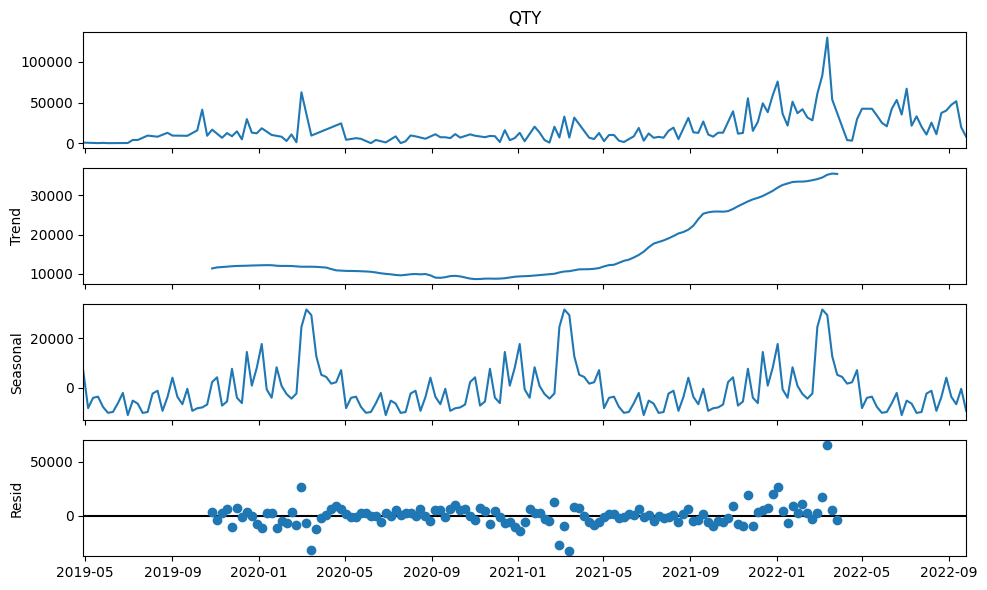

In [34]:
# wykres dekompozycji
decomp.plot()
plt.show()

In [35]:
decomp_multi = sm.tsa.seasonal_decompose(df_resampled['QTY'], model='multiplicative', period =52)

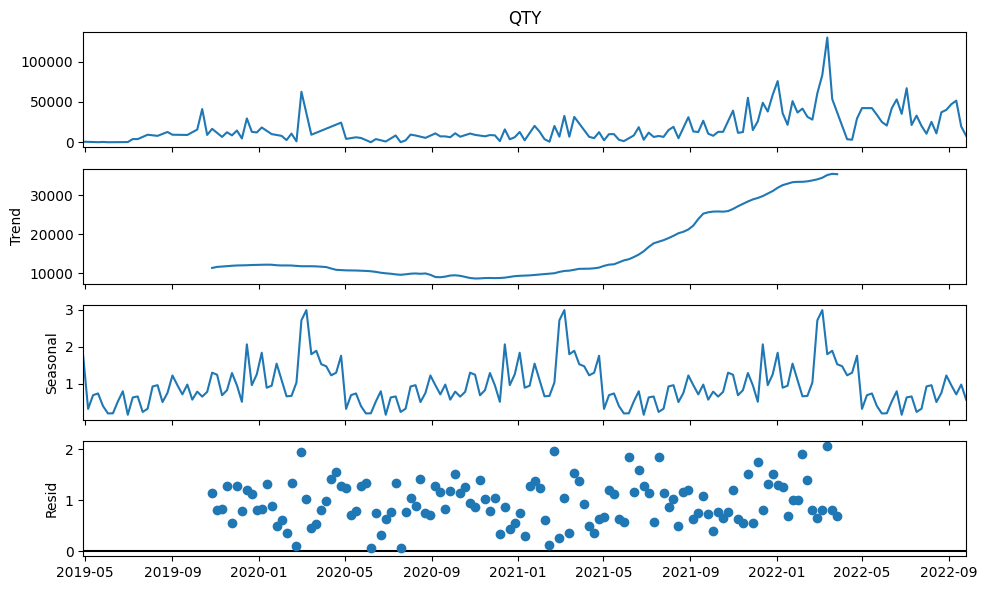

In [36]:
decomp_multi.plot()
plt.show()

In [39]:
decomp_multi.resid

week_start_date
2019-04-28   NaN
2019-05-05   NaN
2019-05-12   NaN
2019-05-19   NaN
2019-05-26   NaN
              ..
2022-08-28   NaN
2022-09-04   NaN
2022-09-11   NaN
2022-09-18   NaN
2022-09-25   NaN
Freq: W-SUN, Name: resid, Length: 179, dtype: float64

In [40]:
decomp_multi.seasonal

week_start_date
2019-04-28    1.755404
2019-05-05    0.316800
2019-05-12    0.688621
2019-05-19    0.734968
2019-05-26    0.393874
                ...   
2022-08-28    1.221121
2022-09-04    0.957601
2022-09-11    0.709523
2022-09-18    0.974713
2022-09-25    0.567123
Freq: W-SUN, Name: seasonal, Length: 179, dtype: float64

In [41]:
decomp_multi.trend

week_start_date
2019-04-28   NaN
2019-05-05   NaN
2019-05-12   NaN
2019-05-19   NaN
2019-05-26   NaN
              ..
2022-08-28   NaN
2022-09-04   NaN
2022-09-11   NaN
2022-09-18   NaN
2022-09-25   NaN
Freq: W-SUN, Name: trend, Length: 179, dtype: float64

In [52]:
decomp_multi.observed[26:]

week_start_date
2019-10-27    16700.0
2019-11-03    11700.0
2019-11-10     6700.0
2019-11-17    12476.0
2019-11-24     8604.0
               ...   
2022-08-28    40195.0
2022-09-04    47163.0
2022-09-11    51610.0
2022-09-18    19543.0
2022-09-25     8008.0
Freq: W-SUN, Name: QTY, Length: 153, dtype: float64

In [53]:
(decomp_multi.trend * decomp_multi.seasonal * decomp_multi.resid)[26:]

week_start_date
2019-10-27    16700.0
2019-11-03    11700.0
2019-11-10     6700.0
2019-11-17    12476.0
2019-11-24     8604.0
               ...   
2022-08-28        NaN
2022-09-04        NaN
2022-09-11        NaN
2022-09-18        NaN
2022-09-25        NaN
Freq: W-SUN, Length: 153, dtype: float64

In [56]:
df_resampled['QTY'][26:]

week_start_date
2019-10-27    16700.0
2019-11-03    11700.0
2019-11-10     6700.0
2019-11-17    12476.0
2019-11-24     8604.0
               ...   
2022-08-28    40195.0
2022-09-04    47163.0
2022-09-11    51610.0
2022-09-18    19543.0
2022-09-25     8008.0
Freq: W-SUN, Name: QTY, Length: 153, dtype: float64

## PACF i ACF

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

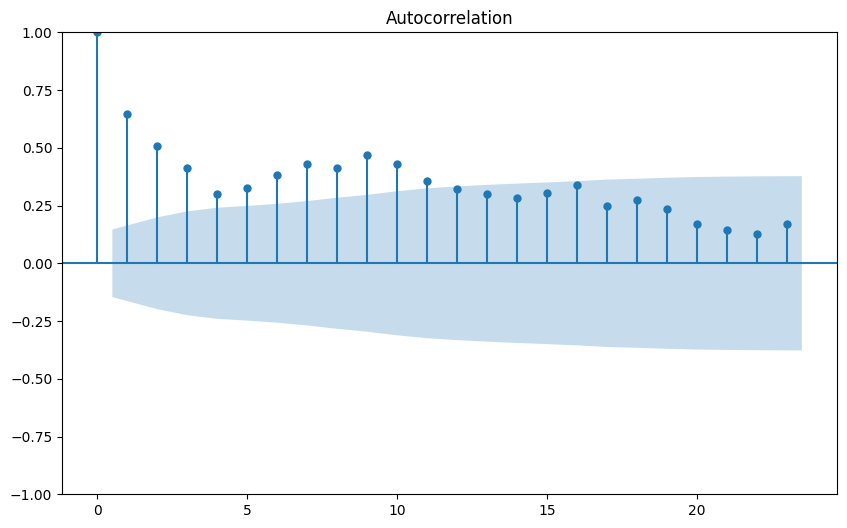

In [58]:
# ACF
plot_acf(df_resampled['QTY'])
plt.show()

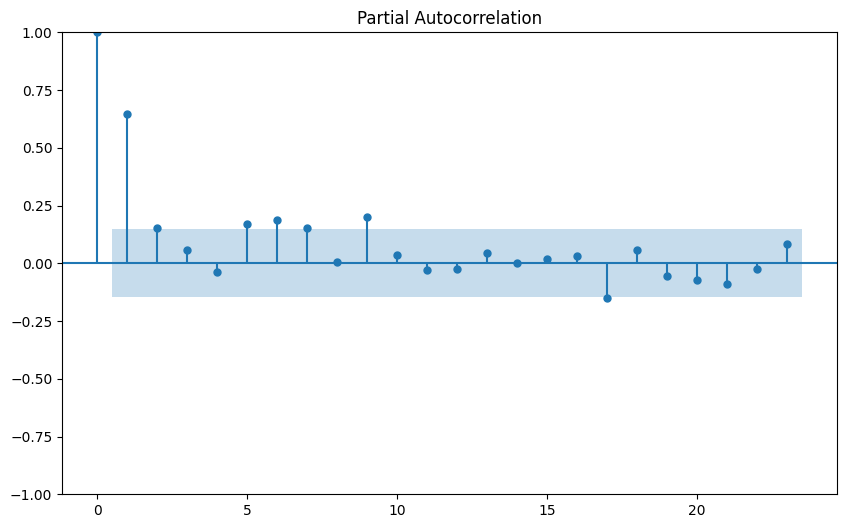

In [59]:
# PACF
plot_pacf(df_resampled['QTY'])
plt.show()